In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
import cmocean
from salishsea_tools import viz_tools, grid_tools, evaltools as et
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.patheffects as path_effects
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('legend', fontsize=10)
mpl.rc('axes', titlesize=10)
mpl.rc('axes', labelsize=10)
mpl.rc('figure', titlesize=10)
mpl.rc('font', size=10)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][:,...]
    umask=mesh.variables['umask'][:,...]
    vmask=mesh.variables['vmask'][:,...]
    e1t=mesh.variables['e1t'][:,...]
    e2t=mesh.variables['e2t'][:,...]
    e1v=mesh.variables['e1v'][:,...]
    e2v=mesh.variables['e2v'][:,...]
    e1u=mesh.variables['e1u'][:,...]
    e2u=mesh.variables['e2u'][:,...]
    e3t_0=mesh.variables['e3t_0'][:,...]
    e3v_0=mesh.variables['e3v_0'][:,...]
    e3u_0=mesh.variables['e3u_0'][:,...]

In [2]:
start17=dt.datetime(2017,2,1) 
end17=dt.datetime(2017,10,1)
start16=dt.datetime(2016,2,1) 
end16=dt.datetime(2016,10,1)
mod_basedir_1905='/results/SalishSea/hindcast.201905/'
mod_basedir_1812='/results2/SalishSea/nowcast-green.201812/'
mod_nam_fmt='nowcast'
mod_flen=1

In [50]:
flistP_1812_16=et.index_model_files(start16,end16,mod_basedir_1812,mod_nam_fmt,mod_flen,'ptrc_T',1)
flistP_1905_16=et.index_model_files(start16,end16,mod_basedir_1905,mod_nam_fmt,mod_flen,'ptrc_T',1)
flistP_1812_17=et.index_model_files(start17,end17,mod_basedir_1812,mod_nam_fmt,mod_flen,'ptrc_T',1)
flistP_1905_17=et.index_model_files(start17,end17,mod_basedir_1905,mod_nam_fmt,mod_flen,'ptrc_T',1)
flistT_1812_16=et.index_model_files(start16,end16,mod_basedir_1812,mod_nam_fmt,mod_flen,'grid_T',1)
flistT_1905_16=et.index_model_files(start16,end16,mod_basedir_1905,mod_nam_fmt,mod_flen,'grid_T',1)
flistT_1812_17=et.index_model_files(start17,end17,mod_basedir_1812,mod_nam_fmt,mod_flen,'grid_T',1)
flistT_1905_17=et.index_model_files(start17,end17,mod_basedir_1905,mod_nam_fmt,mod_flen,'grid_T',1)
fliste3t_1812_16=et.index_model_files(start16,end16,mod_basedir_1812,mod_nam_fmt,mod_flen,'carp_T',1)
fliste3t_1905_16=et.index_model_files(start16,end16,mod_basedir_1905,mod_nam_fmt,mod_flen,'carp_T',1)
fliste3t_1812_17=et.index_model_files(start17,end17,mod_basedir_1812,mod_nam_fmt,mod_flen,'carp_T',1)
fliste3t_1905_17=et.index_model_files(start17,end17,mod_basedir_1905,mod_nam_fmt,mod_flen,'carp_T',1)

In [75]:
len(flistP_1812_16),len(flistP_1812_17)

(244, 243)

In [77]:
flistP_1812_16['t_0'][0].strftime('%b %d')

'Feb 01'

In [51]:
f_P_1812_16=nc.Dataset(flistP_1812_16['paths'][0])
f_P_1812_17=nc.Dataset(flistP_1812_17['paths'][0])
f_P_1905_16=nc.Dataset(flistP_1905_16['paths'][0])
f_P_1905_17=nc.Dataset(flistP_1905_17['paths'][0])
f_T_1812_16=nc.Dataset(flistT_1812_16['paths'][0])
f_T_1812_17=nc.Dataset(flistT_1812_17['paths'][0])
f_T_1905_16=nc.Dataset(flistT_1905_16['paths'][0])
f_T_1905_17=nc.Dataset(flistT_1905_17['paths'][0])
f_e3t_1812_16=nc.Dataset(fliste3t_1812_16['paths'][0])
f_e3t_1812_17=nc.Dataset(fliste3t_1812_17['paths'][0])
f_e3t_1905_16=nc.Dataset(fliste3t_1905_16['paths'][0])
f_e3t_1905_17=nc.Dataset(fliste3t_1905_17['paths'][0])

In [13]:
def calcIPhy(fidP,fide3t,tmask):
    phyZ=tmask*fide3t.variables['e3t'][:,...]*(fidP.variables['diatoms'][:,...]+fidP.variables['ciliates'][:,...]+fidP.variables['flagellates'][:,...])
    IPhy=np.sum(phyZ,1)
    return IPhy

In [54]:
def calcS0(fidT,tmask):
    S0=tmask[:,0,:,:]*fidT.variables['vosaline'][:,0,...]
    return S0

In [21]:
IPhy_1812_16=np.mean(calcIPhy(f_P_1812_16,f_e3t_1812_16,tmask),0)
IPhy_1812_17=np.mean(calcIPhy(f_P_1812_17,f_e3t_1812_17,tmask),0)
IPhy_1905_16=np.mean(calcIPhy(f_P_1905_16,f_e3t_1905_16,tmask),0)
IPhy_1905_17=np.mean(calcIPhy(f_P_1905_17,f_e3t_1905_17,tmask),0)

In [65]:
S0_1812_16=np.mean(calcS0(f_T_1812_16,tmask),0)
S0_1812_17=np.mean(calcS0(f_T_1812_17,tmask),0)
S0_1905_16=np.mean(calcS0(f_T_1905_16,tmask),0)
S0_1905_17=np.mean(calcS0(f_T_1905_17,tmask),0)

In [72]:
def make_fig(tmask,IPhy_1812_16,IPhy_1905_16,IPhy_1812_17,IPhy_1905_17,S0_1812_16,S0_1905_16,S0_1812_17,S0_1905_17,datestr,iii):
    cmP=cmocean.cm.thermal
    cmS=cmocean.cm.haline_r
    fig=plt.figure(figsize=(7,7))
    gs0 = gridspec.GridSpec(2,5,wspace=.25,left=.03,right=.95,
                            bottom=.05,top=.85,width_ratios=[1,1,1,1,.2])
    ax=list()
    for ii in range(0,4):
        ax.append(fig.add_subplot(gs0[0,ii]))
        viz_tools.set_aspect(ax[ii])
        ax[ii].get_xaxis().set_visible(False)
        ax[ii].get_yaxis().set_visible(False)
    cbax=fig.add_subplot(gs0[0,4])
    clim=(0,500)
    mm=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,IPhy_1812_16),vmin=clim[0],vmax=clim[1],cmap=cmP)
    ax[0].set_title('Phyto\n1812 16')
    ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,IPhy_1905_16),vmin=clim[0],vmax=clim[1],cmap=cmP)
    ax[1].set_title('Phyto\n1905 16')
    ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,IPhy_1812_17),vmin=clim[0],vmax=clim[1],cmap=cmP)
    ax[2].set_title('Phyto\n1812 17')
    ax[3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,IPhy_1905_17),vmin=clim[0],vmax=clim[1],cmap=cmP)
    ax[3].set_title('Phyto\n1905 17')
    fig.colorbar(mm,cax=cbax)
    ax[0].annotate(datestr,xy=(.5,.95),ha='center',xycoords='figure fraction',fontsize=12)
    
    axb=list()
    for ii in range(0,4):
        axb.append(fig.add_subplot(gs0[1,ii]))
        viz_tools.set_aspect(axb[ii])
        axb[ii].get_xaxis().set_visible(False)
        axb[ii].get_yaxis().set_visible(False)
    cbaxb=fig.add_subplot(gs0[1,4])
    climb=(0,35)
    mm=axb[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,S0_1812_16),vmin=climb[0],vmax=climb[1],cmap=cmS)
    axb[0].set_title('S0\n1812 16')
    axb[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,S0_1905_16),vmin=climb[0],vmax=climb[1],cmap=cmS)
    axb[1].set_title('S0\n1905 16')
    axb[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,S0_1812_17),vmin=climb[0],vmax=climb[1],cmap=cmS)
    axb[2].set_title('S0\n1812 17')
    axb[3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,S0_1905_17),vmin=climb[0],vmax=climb[1],cmap=cmS)
    axb[3].set_title('S0\n1905 17')
    fig.colorbar(mm,cax=cbaxb)
    fig.savefig('./movie_1/movie_'+format(iii, "04d")+'.png',dpi=100)

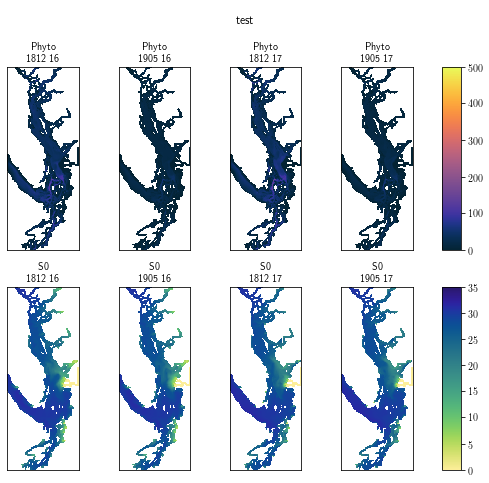

In [73]:
make_fig(tmask,IPhy_1812_16,IPhy_1905_16,IPhy_1812_17,IPhy_1905_17,S0_1812_16,S0_1905_16,S0_1812_17,S0_1905_17,'test',0)

In [ ]:
fig.savefig('./files/movie_'+format(iii, "04d")+'.png',dpi=100)